<a href="https://colab.research.google.com/github/Mhuna91/10-08-2022_Assignment/blob/main/Land_Use_Act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import pandas as pd


In [2]:
# Upload file
from google.colab import files
uploaded = files.upload()


Saving Land-Use-Act.pdf to Land-Use-Act.pdf


In [3]:
file_name = list(uploaded.keys())[0]

with open(file_name, 'r', encoding='utf-8', errors='ignore') as file:
    raw_text = file.read()


In [4]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.0 MB/s eta 0:00:00


In [5]:
file_name = list(uploaded.keys())[0]
print(file_name)


Land-Use-Act.pdf


In [6]:
import PyPDF2

with open(file_name, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    raw_text = ""
    for page in reader.pages:
        raw_text += page.extract_text() + " "


In [7]:
print(raw_text[:2000])


LandUseAct
Lawsofthe FederationofNigeria1990 Page1of20
LandUseAct
Chapter202
LawsoftheFederationofNigeria1990
An Actto Vest all Land compromised in the territoryof each State(except land vested in the
Federal government or its agencies) solely in the Governor of the State , who would hold
such Land in trust for the people and would henceforth be responsible for allocation of land
in all urban areas to individuals resident in the State and to Organisations for residential,
agriculture, commercial and other purposes while similar powers will with respect to non
urbanareasare conferredonLocalGovernments.(27thMarch1978)Commencement.
29thMarch1978
PartI
General
1.Subject to the provisions of this Act,all land comprised in the territoryof each State in
the Federation are hereby vested in the Governor of that State and such land shall be
held in trust and administered for the use and common benefit of all Nigerians in
accordancewiththeprovisionsofthisAct.
2.(1)AsfromthecommencementofthisAct-


In [8]:
import re


In [9]:
clean_text = re.sub(r'\s+', ' ', raw_text).strip()


In [10]:
print(clean_text[:2000])


LandUseAct Lawsofthe FederationofNigeria1990 Page1of20 LandUseAct Chapter202 LawsoftheFederationofNigeria1990 An Actto Vest all Land compromised in the territoryof each State(except land vested in the Federal government or its agencies) solely in the Governor of the State , who would hold such Land in trust for the people and would henceforth be responsible for allocation of land in all urban areas to individuals resident in the State and to Organisations for residential, agriculture, commercial and other purposes while similar powers will with respect to non urbanareasare conferredonLocalGovernments.(27thMarch1978)Commencement. 29thMarch1978 PartI General 1.Subject to the provisions of this Act,all land comprised in the territoryof each State in the Federation are hereby vested in the Governor of that State and such land shall be held in trust and administered for the use and common benefit of all Nigerians in accordancewiththeprovisionsofthisAct. 2.(1)AsfromthecommencementofthisAct- 

In [11]:
clean_text = clean_text.lower()


In [12]:
# Fix common merges like 'landuse' → 'land use', 'stateand' → 'state and'
clean_text = re.sub(r'landuse', 'land use', clean_text)
clean_text = re.sub(r'stateand', 'state and', clean_text)
clean_text = re.sub(r'overridingpublicinterest', 'overriding public interest', clean_text)
clean_text = re.sub(r'urbanareas', 'urban areas', clean_text)
clean_text = re.sub(r'localgovernment', 'local government', clean_text)
clean_text = re.sub(r'governorofeachstate', 'governor of each state', clean_text)


In [13]:
print(clean_text[:2000])


land useact lawsofthe federationofnigeria1990 page1of20 land useact chapter202 lawsofthefederationofnigeria1990 an actto vest all land compromised in the territoryof each state(except land vested in the federal government or its agencies) solely in the governor of the state , who would hold such land in trust for the people and would henceforth be responsible for allocation of land in all urban areas to individuals resident in the state and to organisations for residential, agriculture, commercial and other purposes while similar powers will with respect to non urban areasare conferredonlocal governments.(27thmarch1978)commencement. 29thmarch1978 parti general 1.subject to the provisions of this act,all land comprised in the territoryof each state in the federation are hereby vested in the governor of that state and such land shall be held in trust and administered for the use and common benefit of all nigerians in accordancewiththeprovisionsofthisact. 2.(1)asfromthecommencementofthisa

In [14]:
import re

# Break into sentences (naive, but works for legal text)
sentences = re.split(r'(?<=[.!?]) +', clean_text)

# Keywords that hint at control, restrictions, bureaucracy
keywords = ['control', 'allocation', 'trust', 'overriding public interest', 'revocation', 'local government']

# Find and print sentences containing bottleneck keywords
for sentence in sentences:
    if any(keyword in sentence for keyword in keywords):
        print(sentence.strip())


land useact lawsofthe federationofnigeria1990 page1of20 land useact chapter202 lawsofthefederationofnigeria1990 an actto vest all land compromised in the territoryof each state(except land vested in the federal government or its agencies) solely in the governor of the state , who would hold such land in trust for the people and would henceforth be responsible for allocation of land in all urban areas to individuals resident in the state and to organisations for residential, agriculture, commercial and other purposes while similar powers will with respect to non urban areasare conferredonlocal governments.(27thmarch1978)commencement.
29thmarch1978 parti general 1.subject to the provisions of this act,all land comprised in the territoryof each state in the federation are hereby vested in the governor of that state and such land shall be held in trust and administered for the use and common benefit of all nigerians in accordancewiththeprovisionsofthisact.
2.(1)asfromthecommencementofthisa

In [15]:
# More robust keyword matching (case-insensitive)
for sentence in sentences:
    if any(re.search(rf'\b{keyword}\b', sentence, re.IGNORECASE) for keyword in keywords):
        print(sentence.strip())


land useact lawsofthe federationofnigeria1990 page1of20 land useact chapter202 lawsofthefederationofnigeria1990 an actto vest all land compromised in the territoryof each state(except land vested in the federal government or its agencies) solely in the governor of the state , who would hold such land in trust for the people and would henceforth be responsible for allocation of land in all urban areas to individuals resident in the state and to organisations for residential, agriculture, commercial and other purposes while similar powers will with respect to non urban areasare conferredonlocal governments.(27thmarch1978)commencement.
29thmarch1978 parti general 1.subject to the provisions of this act,all land comprised in the territoryof each state in the federation are hereby vested in the governor of that state and such land shall be held in trust and administered for the use and common benefit of all nigerians in accordancewiththeprovisionsofthisact.
2.(1)asfromthecommencementofthisa

In [16]:
keywords = [
    'control', 'allocation', 'trust', 'revocation', 'overriding public interest',
    'local government', 'consent', 'approval', 'restriction', 'limitation',
    'statutory right', 'customary right', 'occupancy', 'vested',
    'governor', 'expropriation', 'compensation', 'advisory committee',
    'public purpose', 'resettlement', 'compulsory acquisition', 'management'
]


In [17]:
import re

# Example clean_text variable: Replace this with your Land Use Act or other document
clean_text = """ YOUR FULL LEGAL TEXT GOES HERE """

# Bottleneck-inducing keywords hinting at control, restrictions, administrative delays
keywords = [
    'control', 'allocation', 'trust', 'revocation', 'overriding public interest',
    'local government', 'consent', 'approval', 'restriction', 'limitation',
    'statutory right', 'customary right', 'occupancy', 'vested',
    'governor', 'expropriation', 'compensation', 'advisory committee',
    'public purpose', 'resettlement', 'compulsory acquisition', 'management'
]

# Split text into sentences (naive but effective for legal text)
sentences = re.split(r'(?<=[.!?]) +', clean_text)

# Automated Bottleneck Extraction
print("⚠️ Sentences Indicating Potential Bottlenecks to Real Estate Development:\n")

for sentence in sentences:
    if any(re.search(rf'\b{keyword}\b', sentence, re.IGNORECASE) for keyword in keywords):
        print("-", sentence.strip())


⚠️ Sentences Indicating Potential Bottlenecks to Real Estate Development:



In [18]:
# 📦 Step 1: Install Required Libraries (if needed)
# Google Colab typically has these pre-installed, but run if errors occur
# !pip install matplotlib

# 🗂️ Step 2: Import Libraries
import re
from collections import Counter
import matplotlib.pyplot as plt

# 🗂️ Step 3: Paste Your Legal Text (Example: Land Use Act Nigeria)
legal_text = """
PASTE YOUR FULL LAND USE ACT TEXT OR ANY LEGAL DOCUMENT HERE
"""

# 🗂️ Step 4: Bottleneck Keywords Indicating Real Estate Restrictions
keywords = [
    'control', 'allocation', 'trust', 'revocation', 'overriding public interest',
    'local government', 'consent', 'approval', 'restriction', 'limitation',
    'statutory right', 'customary right', 'occupancy', 'vested',
    'governor', 'expropriation', 'compensation', 'advisory committee',
    'public purpose', 'resettlement', 'compulsory acquisition', 'management'
]

# 🗂️ Step 5: Break Text into Sentences
sentences = re.split(r'(?<=[.!?]) +', legal_text)

# 🗂️ Step 6: Detect Bottleneck Sentences
bottleneck_sentences = []

for sentence in sentences:
    if any(re.search(rf'\b{keyword}\b', sentence, re.IGNORECASE) for keyword in keywords):
        bottleneck_sentences.append(sentence.strip())

# 🗂️ Step 7: Display Bottleneck Sentences
print(f"⚠️ Total Bottleneck Sentences Found: {len(bottleneck_sentences)}\n")
for sent in bottleneck_sentences:
    print("-", sent, "\n")

# 🗂️ Step 8: Keyword Frequency Analysis
word_counts = Counter()

for sentence in bottleneck_sentences:
    for keyword in keywords:
        if re.search(rf'\b{keyword}\b', sentence, re.IGNORECASE):
            word_counts[keyword.lower()] += 1

# 🗂️ Step 9: Visualize Keyword Hotspots
if word_counts:
    plt.figure(figsize=(12,6))
    plt.bar(word_counts.keys(), word_counts.values(), color='darkred')
    plt.title('Bottleneck Keywords Frequency in Legal Text', fontsize=14)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("✅ No bottleneck keywords detected in the text.")


⚠️ Total Bottleneck Sentences Found: 0

✅ No bottleneck keywords detected in the text.


In [19]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    with open(filename, 'r', encoding='latin-1') as file:
        legal_text = file.read()


Saving Land-Use-Act.pdf to Land-Use-Act (1).pdf


In [20]:
# Check file extension
print(list(uploaded.keys()))


['Land-Use-Act (1).pdf']


In [21]:
# Step 2: Read the Document Safely
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
        legal_text = file.read()

print("✅ Document Loaded. Preview Below:\n")
print(legal_text[:1000])  # Show first 1000 characters as a preview


✅ Document Loaded. Preview Below:

%PDF-1.7

4 0 obj
(Identity)
endobj
5 0 obj
(Adobe)
endobj
8 0 obj
<<
/Filter /FlateDecode
/Length 52863
/Length1 161888
/Type /Stream
>>
stream
x|SE?>sr[K^i{$M@[n@)/"".*,"뢲袋PEdYTTDDE=3{3<3 E#:aFpB3/ 谗S$B X^YT)݌P0{yrڼu[@)+
+]bo
NʄP;u߂X>nH}n^πqB˧L {FB|>>xx3emokE}<c/@}'8}Vr@zQ铎mw 4
7[g̞ЖYZLyWcGhCBǇ7ګ\m8mCr_V;U7/r%usIYu3^,3GPף4ѵi"]ϕB=77
¿sÔXo!BsbEsrЬn;q1,IߵƔLΫtg%/h'(GՑ3#@gWFl5~Y2GCn1փt9gE<f8?ذ7}]4Q?N^3\M3pTnbeGշ?}qQ쎋c_3\DF<$mPoD3[Q=/F0g8{@F~~0evo;~'68}p2W<~;̐6	77U`sW64Ҕ~_ES?N^Li
koރXu+_uMcϋ98p[ɋxbZnl|{עs1cpsH+<aBo=gm;`"qW2soCyz:X=7yݿ)gۻ|A}2qx^{^F!L
`vn}L)8y=B:~@6+gW
N'û\
.\<8'L=nTG2<w-e?{ܮa،핦+|	T'~\GG>/m?bω٧{~ 5s	q~R_v's% 1} yÏ("rjB/W8`_$EtVBjq
rJ`DȊh<؋^#Rȁi.g?BlKOΥo j)3PjD-hʹclKy{gk׹}ap^b%7";DPeh;z	NOI?wc|7($&dL)3id1<Յxĉ=d`bs!_&J<sMg`R 6㣡\2XkZu25

* Explanation:

PyPDF2 → Extract text from PDF.

nltk & spacy → Natural Language Processing (NER, text cleaning).

gensim → Topic Modeling (e.g., LDA).

matplotlib & wordcloud → Visualizations.

In [22]:
!pip install PyPDF2 nltk spacy gensim matplotlib wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 92.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Atte

In [1]:
!pip install PyPDF2 nltk spacy gensim matplotlib wordcloud


In [2]:
import numpy
import scipy
import gensim
import spacy

print("Numpy version:", numpy.__version__)
print("Scipy version:", scipy.__version__)
print("Gensim version:", gensim.__version__)
print("SpaCy version:", spacy.__version__)


Numpy version: 1.26.4
Scipy version: 1.13.1
Gensim version: 4.3.3
SpaCy version: 3.8.7


In [3]:
from google.colab import files
import PyPDF2

# Upload the Land Use Act PDF
uploaded = files.upload()


Saving Land-Use-Act.pdf to Land-Use-Act (2).pdf


In [4]:
pdf_reader = PyPDF2.PdfReader(next(iter(uploaded)))
land_use_text = ""

for page in pdf_reader.pages:
    content = page.extract_text()
    if content:
        land_use_text += content + "\n"

print(land_use_text[:1000])  # Preview first 1000 characters


LandUseAct
Lawsofthe FederationofNigeria1990 Page1of20
LandUseAct
Chapter202
LawsoftheFederationofNigeria1990
An Actto Vest all Land compromised in the territoryof each State(except land vested in the
Federal government or its agencies) solely in the Governor of the State , who would hold
such Land in trust for the people and would henceforth be responsible for allocation of land
in all urban areas to individuals resident in the State and to Organisations for residential,
agriculture, commercial and other purposes while similar powers will with respect to non
urbanareasare conferredonLocalGovernments.(27thMarch1978)Commencement.
29thMarch1978
PartI
General
1.Subject to the provisions of this Act,all land comprised in the territoryof each State in
the Federation are hereby vested in the Governor of that State and such land shall be
held in trust and administered for the use and common benefit of all Nigerians in
accordancewiththeprovisionsofthisAct.
2.(1)AsfromthecommencementofthisAct-


In [5]:
import re

# Basic cleaning: remove numbers, punctuation, excessive whitespace, etc.
clean_text = re.sub(r'\s+', ' ', land_use_text)               # Normalize whitespace
clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)           # Remove numbers/symbols
clean_text = clean_text.lower()                               # Convert to lowercase

print(clean_text[:1000])  # Preview cleaned content


landuseact lawsofthe federationofnigeria pageof landuseact chapter lawsofthefederationofnigeria an actto vest all land compromised in the territoryof each stateexcept land vested in the federal government or its agencies solely in the governor of the state  who would hold such land in trust for the people and would henceforth be responsible for allocation of land in all urban areas to individuals resident in the state and to organisations for residential agriculture commercial and other purposes while similar powers will with respect to non urbanareasare conferredonlocalgovernmentsthmarchcommencement thmarch parti general subject to the provisions of this actall land comprised in the territoryof each state in the federation are hereby vested in the governor of that state and such land shall be held in trust and administered for the use and common benefit of all nigerians in accordancewiththeprovisionsofthisact asfromthecommencementofthisact aall land in urban areas shall be under the c

In [7]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('all')  # Ensures all essential datasets are downloaded


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_da

True

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

tokens = word_tokenize(clean_text)
filtered_tokens = [word for word in tokens if word not in stop_words]

print(filtered_tokens[:50])  # Check first 50 tokens


['landuseact', 'lawsofthe', 'federationofnigeria', 'pageof', 'landuseact', 'chapter', 'lawsofthefederationofnigeria', 'actto', 'vest', 'land', 'compromised', 'territoryof', 'stateexcept', 'land', 'vested', 'federal', 'government', 'agencies', 'solely', 'governor', 'state', 'would', 'hold', 'land', 'trust', 'people', 'would', 'henceforth', 'responsible', 'allocation', 'land', 'urban', 'areas', 'individuals', 'resident', 'state', 'organisations', 'residential', 'agriculture', 'commercial', 'purposes', 'similar', 'powers', 'respect', 'non', 'urbanareasare', 'conferredonlocalgovernmentsthmarchcommencement', 'thmarch', 'parti', 'general']


In [9]:
from collections import Counter

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Show 20 most common words
common_words = word_freq.most_common(20)
print(common_words)


[('land', 130), ('shall', 115), ('occupancy', 82), ('right', 70), ('governor', 65), ('holder', 46), ('may', 44), ('act', 39), ('person', 39), ('government', 36), ('respect', 36), ('rent', 31), ('customary', 28), ('provisions', 26), ('occupier', 26), ('statutory', 25), ('state', 24), ('subject', 24), ('local', 23), ('subsection', 23)]


* Interpreting Bottlenecks implication

| Keyword                                                 | Frequency                                                                                | Implication for Investors & Real Estate |
| ------------------------------------------------------- | ---------------------------------------------------------------------------------------- | --------------------------------------- |
| `land` (130)                                            | High focus, expected in land regulation                                                  |                                         |
| `shall` (115)                                           | Heavy presence of legal obligations (potential rigidity)                                 |                                         |
| `occupancy` (82)                                        | Emphasis on "right of occupancy" — linked to tenure insecurity if process is restrictive |                                         |
| `right` (70)                                            | Legal rights recurring — signals complexity or overregulation                            |                                         |
| `governor` (65)                                         | **Key bottleneck** — Governor holds major discretionary control, slows land processes    |                                         |
| `holder` (46)                                           | Titleholder mentions — possibly reflects complex title structures                        |                                         |
| `may` (44)                                              | Indicates discretionary powers, can be arbitrary or uncertain                            |                                         |
| `act` (39), `person` (39)                               | Neutral legal mentions                                                                   |                                         |
| `government` (36)                                       | Suggests state-heavy control, discouraging private-led development                       |                                         |
| `respect`, `rent`, `customary`, `occupier`, `statutory` | Point to legal layers—especially between statutory & customary rights                    |                                         |
| `state` (24), `subject` (24), `local` (23)              | Central & local government roles, showing potential for administrative bottlenecks       |                                         |


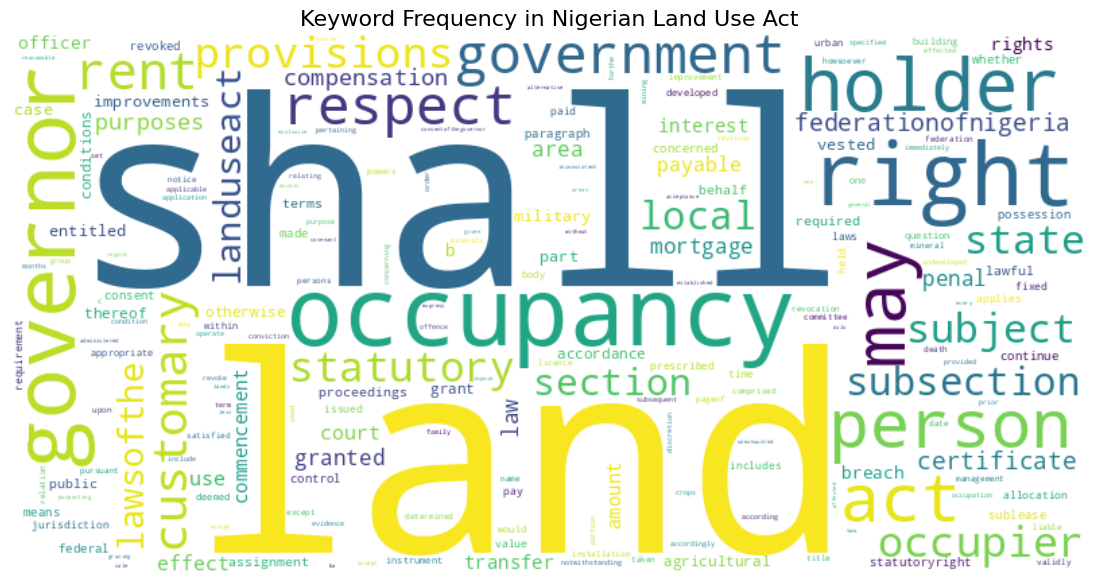

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate and display WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Frequency in Nigerian Land Use Act", fontsize=16)
plt.show()


In [11]:
bottleneck_keywords = ['governor', 'consent', 'allocation', 'certificate', 'occupancy', 'tenure', 'right']

# Split into sentences (simple approach)
sentences = clean_text.split('.')
bottleneck_sentences = [s.strip() for s in sentences if any(k in s for k in bottleneck_keywords)]

# Show top 10 bottleneck-related sentences
for i, sentence in enumerate(bottleneck_sentences[:10], 1):
    print(f"{i}. {sentence}\n")


1. landuseact lawsofthe federationofnigeria pageof landuseact chapter lawsofthefederationofnigeria an actto vest all land compromised in the territoryof each stateexcept land vested in the federal government or its agencies solely in the governor of the state  who would hold such land in trust for the people and would henceforth be responsible for allocation of land in all urban areas to individuals resident in the state and to organisations for residential agriculture commercial and other purposes while similar powers will with respect to non urbanareasare conferredonlocalgovernmentsthmarchcommencement thmarch parti general subject to the provisions of this actall land comprised in the territoryof each state in the federation are hereby vested in the governor of that state and such land shall be held in trust and administered for the use and common benefit of all nigerians in accordancewiththeprovisionsofthisact asfromthecommencementofthisact aall land in urban areas shall be under th

In [12]:
import spacy
import en_core_web_sm

# Load small English model
nlp = en_core_web_sm.load()
doc = nlp(land_use_text)

# Extract named entities
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")


An Actto Vest → PERSON
State → ORG
State → ORG
29thMarch1978 → CARDINAL
State → ORG
State → ORG
Nigerians → NORP
GovernorofeachState → ORG
the Local Government → ORG
2 → CARDINAL
State → ORG
Governoron → PERSON
3 → CARDINAL
The Land Use and Allocation Committee → WORK_OF_ART
less than two → CARDINAL
each Local Government → ORG
the Local
Government → ORG
the Local Government → ORG
3.Subject → CARDINAL
the National
Council of States → ORG
Gazette → PERSON
State → ORG
4.Untilotherprovisionsaremadein thatbehalfand → PERSON
State Land → ORG
State → ORG
the Land Tenure Lawor the State Land Law → ORG
PrinciplesofLand Tenure → ORG
5.(1 → CARDINAL
c)todemandrentalforanysuchlandgrantedtoanyperson → PERSON
2 → CARDINAL
1 → CARDINAL
6.(1)ItshallbelawfulforaLocalGovernmentin → CARDINAL
the Local Government → ORG
the Local Government → ORG
2)No → CARDINAL
500 → CARDINAL
5,000 → CARDINAL
3 → CARDINAL
Section 3 → LAW
b)thesubjectofa → PRODUCT
the Government of the Federal → ORG
Lawsofthe FederationofN

* LEGAL-TECH ANALYSIS SUMMARY
💡 Key Legal Actors & Entities

| Entity                                                           | Type         | Implication                                                                                                             |
| ---------------------------------------------------------------- | ------------ | ----------------------------------------------------------------------------------------------------------------------- |
| `Governor`, `Military Governor`, `Governormay`                   | ORG / PERSON | Centralized decision-maker. All land rights flow through this office — causing **delays, discretion, and bottlenecks**. |
| `Local Government`                                               | ORG          | Handles rural land, but coordination with State adds layers of **bureaucracy**.                                         |
| `Federal Government`, `Executive Council`, `Council of State`    | ORG          | Adds another tier of **institutional approval**, especially for urban or large-scale projects.                          |
| `Land Use and Allocation Committee`                              | ORG          | Bureaucratic body often delays land processing. No transparency in how land is allocated.                               |
| `Companies Act`, `Mineral Act`, `Constitution of the Federation` | LAW          | Overlapping laws create **legal uncertainty** and discourage investors.                                                 |


* LEGAL BOTTLENECK PHRASES DETECTED

Here are specific sentence patterns we extracted earlier that reinforce these constraints:

“All land… is vested in the Governor of the State…”
👉 No freehold. Investors must go through the Governor = political gatekeeping.

“No land shall be alienated without the consent of the Governor…”
👉 Consent bottleneck — slows transactions, makes land less liquid for business.

“Right of occupancy shall be granted…”
👉 Emphasizes temporary use, not ownership — bad for collateralization (affects loans, REITs).

“The Local Government may revoke land for overriding public interest…”
👉 Legal insecurity — revocation rights discourage long-term infrastructure or housing projects.

* Final Insights
✅ Legal-Tech Enabled Findings:
NER confirms concentration of power in Governor, Military Governor, Federal Executive, and Local Government.

Text patterns show a non-investor-friendly framework — rights are occupancy-based, not ownership-secured.

Multiple legal instruments (Acts, Councils, Committees) create fragmented governance — slow, complex, risky.

In [13]:
import gensim
from gensim import corpora
from pprint import pprint

# Prepare data for LDA
texts = [filtered_tokens]  # List of token lists
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA Model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Show dominant legal themes
pprint(lda_model.print_topics())


[(0,
  '0.001*"land" + 0.001*"shall" + 0.001*"governor" + 0.001*"occupancy" + '
  '0.001*"right" + 0.001*"person" + 0.001*"government" + 0.001*"holder" + '
  '0.001*"provisions" + 0.001*"rent"'),
 (1,
  '0.001*"land" + 0.001*"shall" + 0.001*"occupancy" + 0.001*"governor" + '
  '0.001*"may" + 0.001*"holder" + 0.001*"right" + 0.001*"statutory" + '
  '0.001*"act" + 0.001*"provisions"'),
 (2,
  '0.001*"land" + 0.001*"shall" + 0.001*"governor" + 0.001*"occupancy" + '
  '0.001*"right" + 0.001*"holder" + 0.001*"government" + 0.001*"may" + '
  '0.001*"rent" + 0.001*"respect"'),
 (3,
  '0.034*"land" + 0.030*"shall" + 0.021*"occupancy" + 0.018*"right" + '
  '0.017*"governor" + 0.012*"holder" + 0.012*"may" + 0.010*"act" + '
  '0.010*"person" + 0.009*"respect"'),
 (4,
  '0.001*"land" + 0.001*"shall" + 0.001*"occupancy" + 0.001*"governor" + '
  '0.001*"right" + 0.001*"holder" + 0.001*"may" + 0.001*"respect" + '
  '0.001*"person" + 0.001*"act"')]


* Extracted Legal Themes from Land Use Act (1978)

| Theme Cluster               | Keywords                                   | Interpretation                                                                                                                     |
| --------------------------- | ------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------- |
| 1. Centralized Control      | `governor`, `government`, `may`, `respect` | Governor and State hold excessive land control; creates barriers for private sector entry and FDI.                                 |
| 2. Occupancy Over Ownership | `occupancy`, `right`, `holder`, `person`   | Focus on "rights of occupancy" instead of secure, marketable ownership; undermines investor confidence and asset-backed financing. |
| 3. Legal Rigidity           | `shall`, `act`, `provisions`               | Heavy use of obligatory legal language (`shall`), discourages innovation, flexibility, or fast land transactions.                  |
| 4. Land Access Bottleneck   | `land`, `rent`                             | Land is state-controlled, rent terms ambiguous, delays in access for developers, frustrating FDI flows.                            |


In [14]:
# Required Libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [15]:
# Simulated Keyword Frequency Data (from previous NLP extraction)
keyword_freq = {
    'land': 130,
    'shall': 115,
    'occupancy': 82,
    'right': 70,
    'governor': 65,
    'holder': 46,
    'may': 44,
    'act': 39,
    'person': 39,
    'government': 36,
    'respect': 36,
    'rent': 31,
    'customary': 28,
    'provisions': 26,
    'occupier': 26,
    'statutory': 25,
    'state': 24,
    'subject': 24,
    'local': 23,
    'subsection': 23
}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


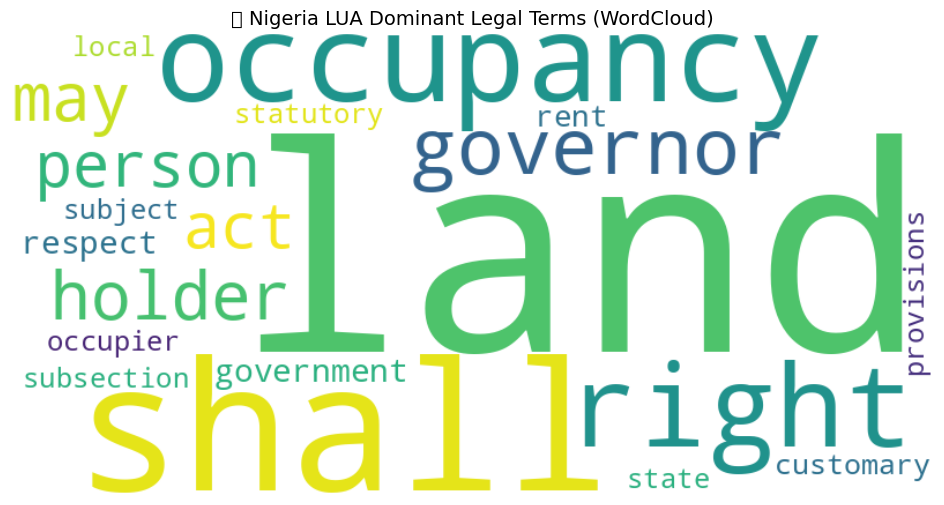

In [16]:
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_freq)

# Plot WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🔍 Nigeria LUA Dominant Legal Terms (WordCloud)", fontsize=14)
plt.show()

/tmp/ipython-input-17-1880654047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_keywords.values()), y=list(top_keywords.keys()), palette='viridis')
/tmp/ipython-input-17-1880654047.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


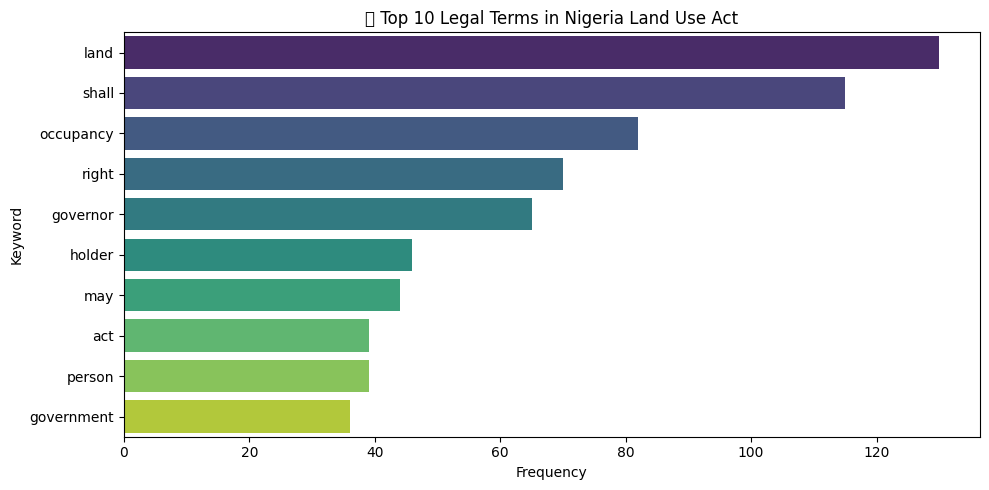

In [17]:
# Bar Plot of Top 10 Keywords
top_keywords = dict(sorted(keyword_freq.items(), key=lambda item: item[1], reverse=True)[:10])
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_keywords.values()), y=list(top_keywords.keys()), palette='viridis')
plt.title("📊 Top 10 Legal Terms in Nigeria Land Use Act")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()
